Principal Component Loadings:
                                                    Principal Component 1  \
Year                                                             0.029389   
CO2 emissions from fuel combustion (MtCO2)                       0.316765   
Average CO2 emission factor (tCO2/toe)                           0.063319   
CO2 intensity at constant purchasing power pari...               0.059384   
Total energy production (Mtoe)                                   0.313307   
Total energy consumption (Mtoe)                                  0.321198   
Share of renewables in electricity production (%)               -0.047058   
Share of electricity in total final energy cons...               0.000058   
Oil products domestic consumption (Mt)                           0.301962   
Refined oil products production (Mt)                             0.305983   
Natural gas production (bcm)                                     0.229917   
Natural gas domestic consumption (bcm)        

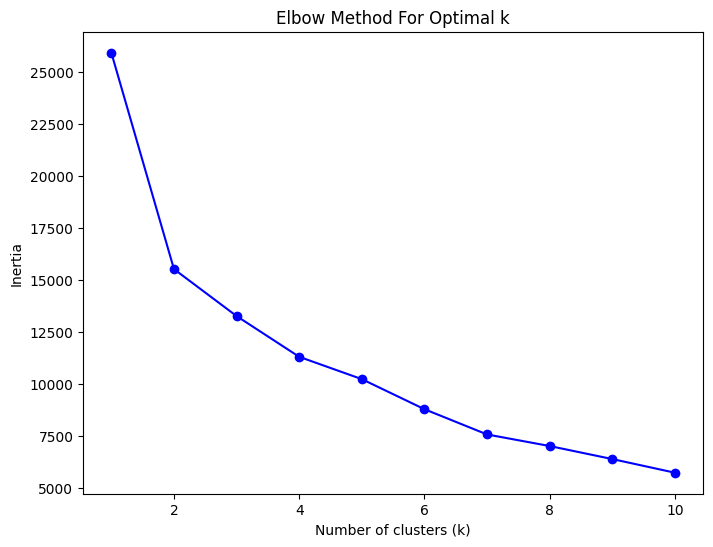

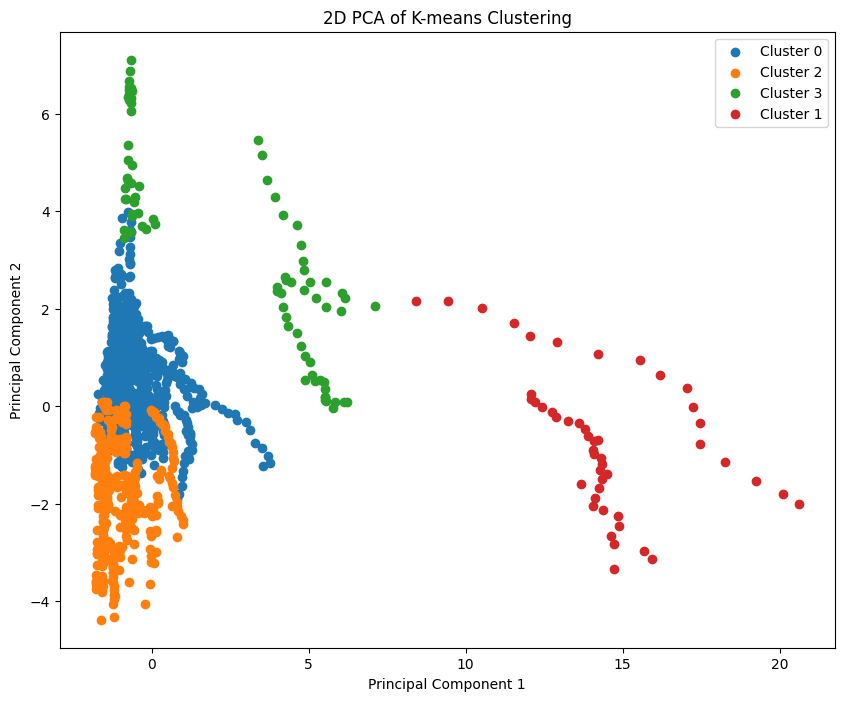

Cluster Summary:
         country         Year  Region  \
Cluster                                 
0            NaN  2004.189873     NaN   
1            NaN  2007.479167     NaN   
2            NaN  2007.692098     NaN   
3            NaN  1999.962500     NaN   

         CO2 emissions from fuel combustion (MtCO2)  \
Cluster                                               
0                                        323.762373   
1                                       6254.211047   
2                                        187.182517   
3                                       1255.801592   

         Average CO2 emission factor (tCO2/toe)  \
Cluster                                           
0                                      2.452998   
1                                      2.657052   
2                                      1.615514   
3                                      2.516053   

         CO2 intensity at constant purchasing power parities (kCO2/$15p)  \
Cluster               

<Figure size 1500x1000 with 0 Axes>

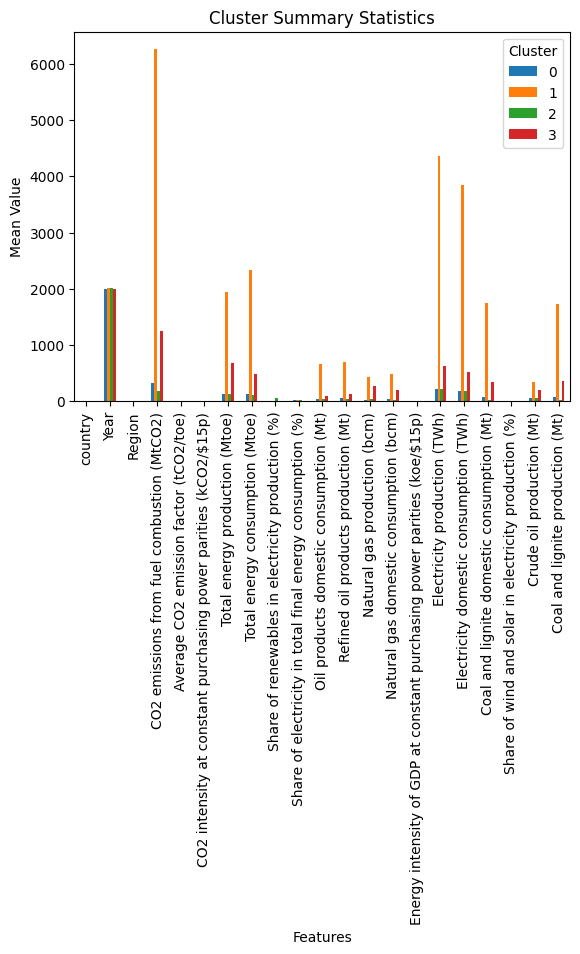

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'original_dataset.csv'
dataset = pd.read_csv(file_path)

# Replace 'n.a.' with NaN
dataset.replace('n.a.', pd.NA, inplace=True)

# Ensure all non-numeric values are properly handled
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean of the respective columns
dataset.fillna(dataset.mean(), inplace=True)

# One-Hot Encoding for categorical variables
categorical_cols = ['country', 'Region']
onehot_encoder = OneHotEncoder(drop='first')
encoded_categorical_data = onehot_encoder.fit_transform(dataset[categorical_cols]).toarray()
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
dataset_processed = dataset.drop(categorical_cols, axis=1)
dataset_processed = pd.concat([dataset_processed, encoded_categorical_df], axis=1)

# Standardizing the numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_processed)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Get the component loadings
loadings = pca.components_.T

# Create a DataFrame for the loadings
loading_df = pd.DataFrame(loadings, columns=['Principal Component 1', 'Principal Component 2'], index=dataset_processed.columns)

# Display the loading DataFrame
print("Principal Component Loadings:")
print(loading_df)

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply KMeans with the optimal number of clusters (4 in this case)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
dataset['Cluster'] = clusters

# Use PCA to reduce dimensions to 2 for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of K-means Clustering')
plt.legend()
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = dataset.groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)

# Visualize the characteristics of each cluster
plt.figure(figsize=(15, 10))
cluster_summary.T.plot(kind='bar')
plt.title('Cluster Summary Statistics')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.show()


In [3]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-means 
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Get score
silhouette_avg = silhouette_score(pca_df, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.51810257705228
